# IPL Cricket Matches Data Analysis and Visualization

This notebook analyzes the IPL (Indian Premier League) cricket matches dataset and creates various visualizations including histograms, pie charts, bar plots, and other insightful charts.

In [4]:
%pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

In [6]:
# Load the dataset
df = pd.read_csv('matches.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (1095, 20)

Column Names:
['id', 'season', 'city', 'date', 'match_type', 'player_of_match', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result', 'result_margin', 'target_runs', 'target_overs', 'super_over', 'method', 'umpire1', 'umpire2']

First 5 rows:


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [7]:
# Basic dataset information
print("Dataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nBasic Statistics:")
df.describe(include='all')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
count,1.095000e+03,1095,1044,1095,1095,1090,1095,1095,1095,1095,1095,1090,1095,1076.000000,1092.000000,1092.000000,1095,21,1095,1095
unique,NaN,17,36,823,8,291,58,19,19,19,2,19,4,NaN,NaN,NaN,2,1,62,62
top,NaN,2013,Mumbai,2017-04-09,League,AB de Villiers,Eden Gardens,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,wickets,NaN,NaN,NaN,N,D/L,AK Chaudhary,S Ravi
freq,NaN,76,173,2,1029,25,77,135,138,143,704,144,578,NaN,NaN,NaN,1081,21,115,83
mean,9.048283e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.259294,165.684066,19.759341,NaN,NaN,NaN,NaN
std,3.677402e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.787444,33.427048,1.581108,NaN,NaN,NaN,NaN
min,3.359820e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,43.000000,5.000000,NaN,NaN,NaN,NaN
25%,5.483315e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,146.000000,20.000000,NaN,NaN,NaN,NaN
50%,9.809610e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,166.000000,20.000000,NaN,NaN,NaN,NaN
75%,1.254062e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,187.000000,20.000000,NaN,NaN,NaN,NaN


## 1. Histogram Visualizations

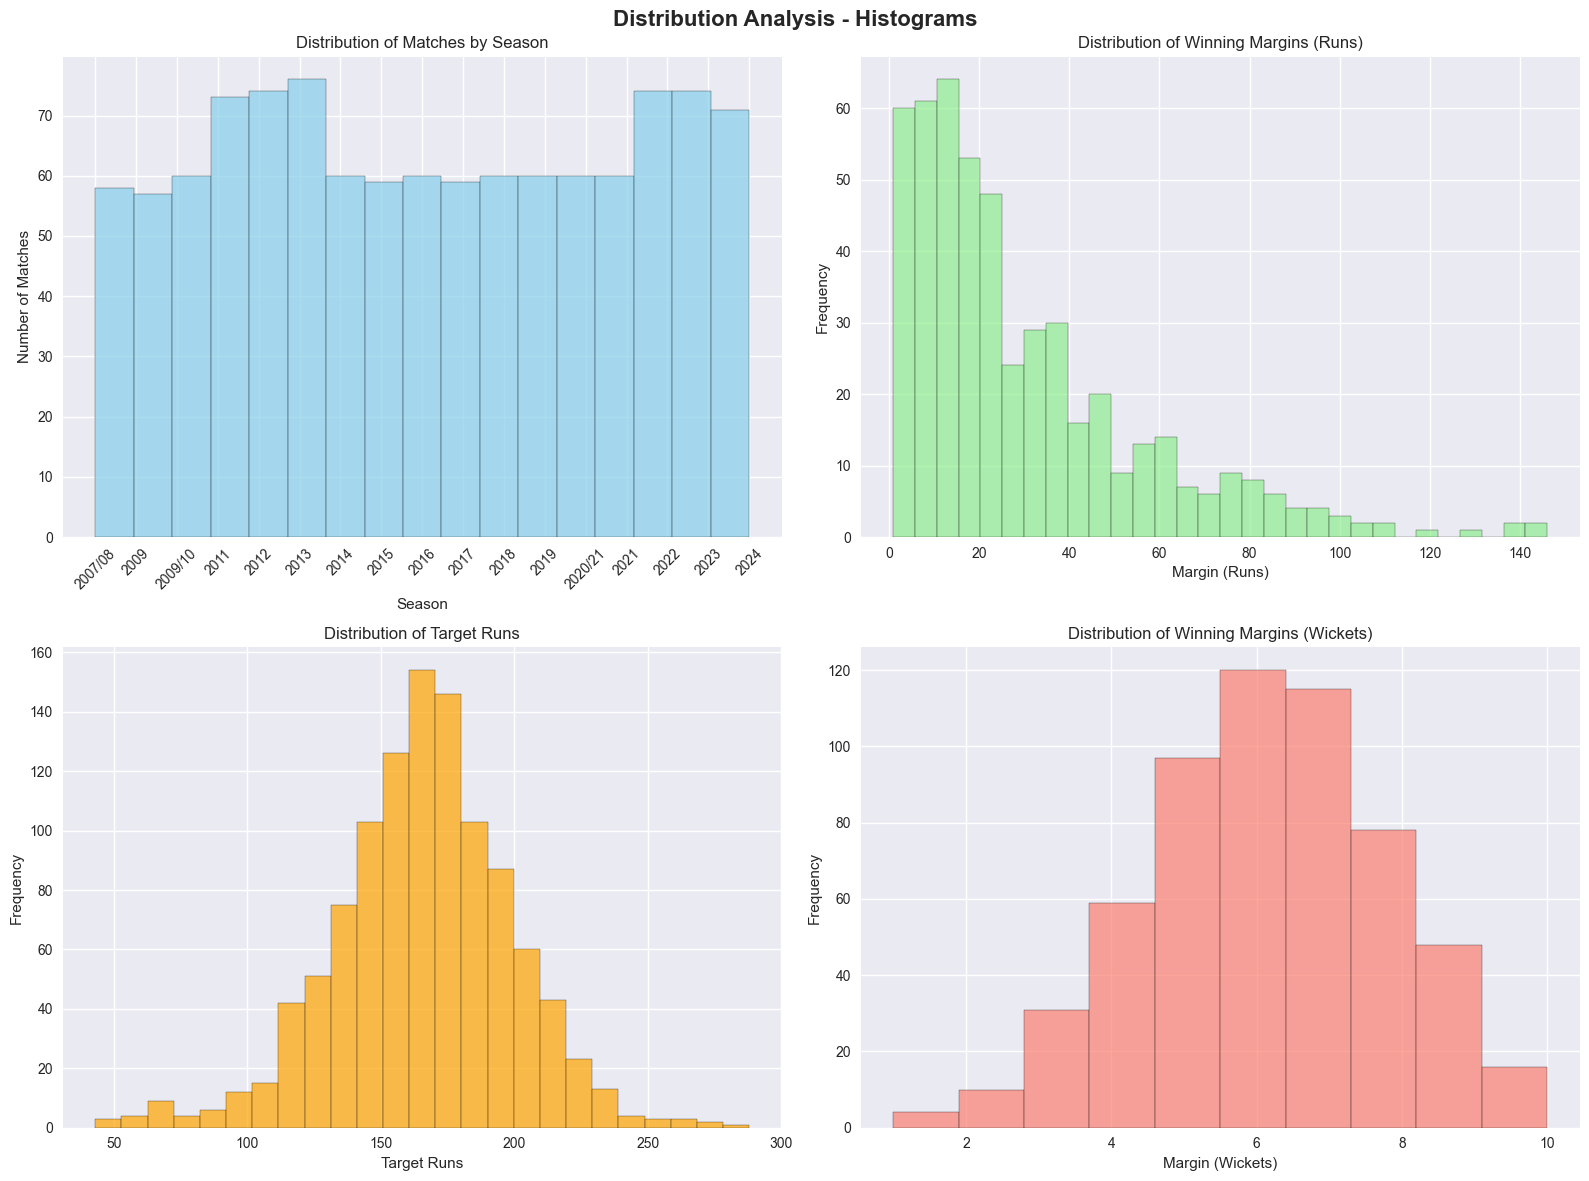

In [8]:
# Create subplots for multiple histograms
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribution Analysis - Histograms', fontsize=16, fontweight='bold')

# 1. Distribution of matches by season
season_counts = df['season'].value_counts().sort_index()
axes[0, 0].hist(df['season'], bins=len(season_counts), alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Matches by Season')
axes[0, 0].set_xlabel('Season')
axes[0, 0].set_ylabel('Number of Matches')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Distribution of result margins (runs)
runs_margin = df[df['result'] == 'runs']['result_margin'].dropna()
axes[0, 1].hist(runs_margin, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Distribution of Winning Margins (Runs)')
axes[0, 1].set_xlabel('Margin (Runs)')
axes[0, 1].set_ylabel('Frequency')

# 3. Distribution of target runs
target_runs = df['target_runs'].dropna()
axes[1, 0].hist(target_runs, bins=25, alpha=0.7, color='orange', edgecolor='black')
axes[1, 0].set_title('Distribution of Target Runs')
axes[1, 0].set_xlabel('Target Runs')
axes[1, 0].set_ylabel('Frequency')

# 4. Distribution of wicket margins
wickets_margin = df[df['result'] == 'wickets']['result_margin'].dropna()
axes[1, 1].hist(wickets_margin, bins=10, alpha=0.7, color='salmon', edgecolor='black')
axes[1, 1].set_title('Distribution of Winning Margins (Wickets)')
axes[1, 1].set_xlabel('Margin (Wickets)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 2. Pie Chart Visualizations

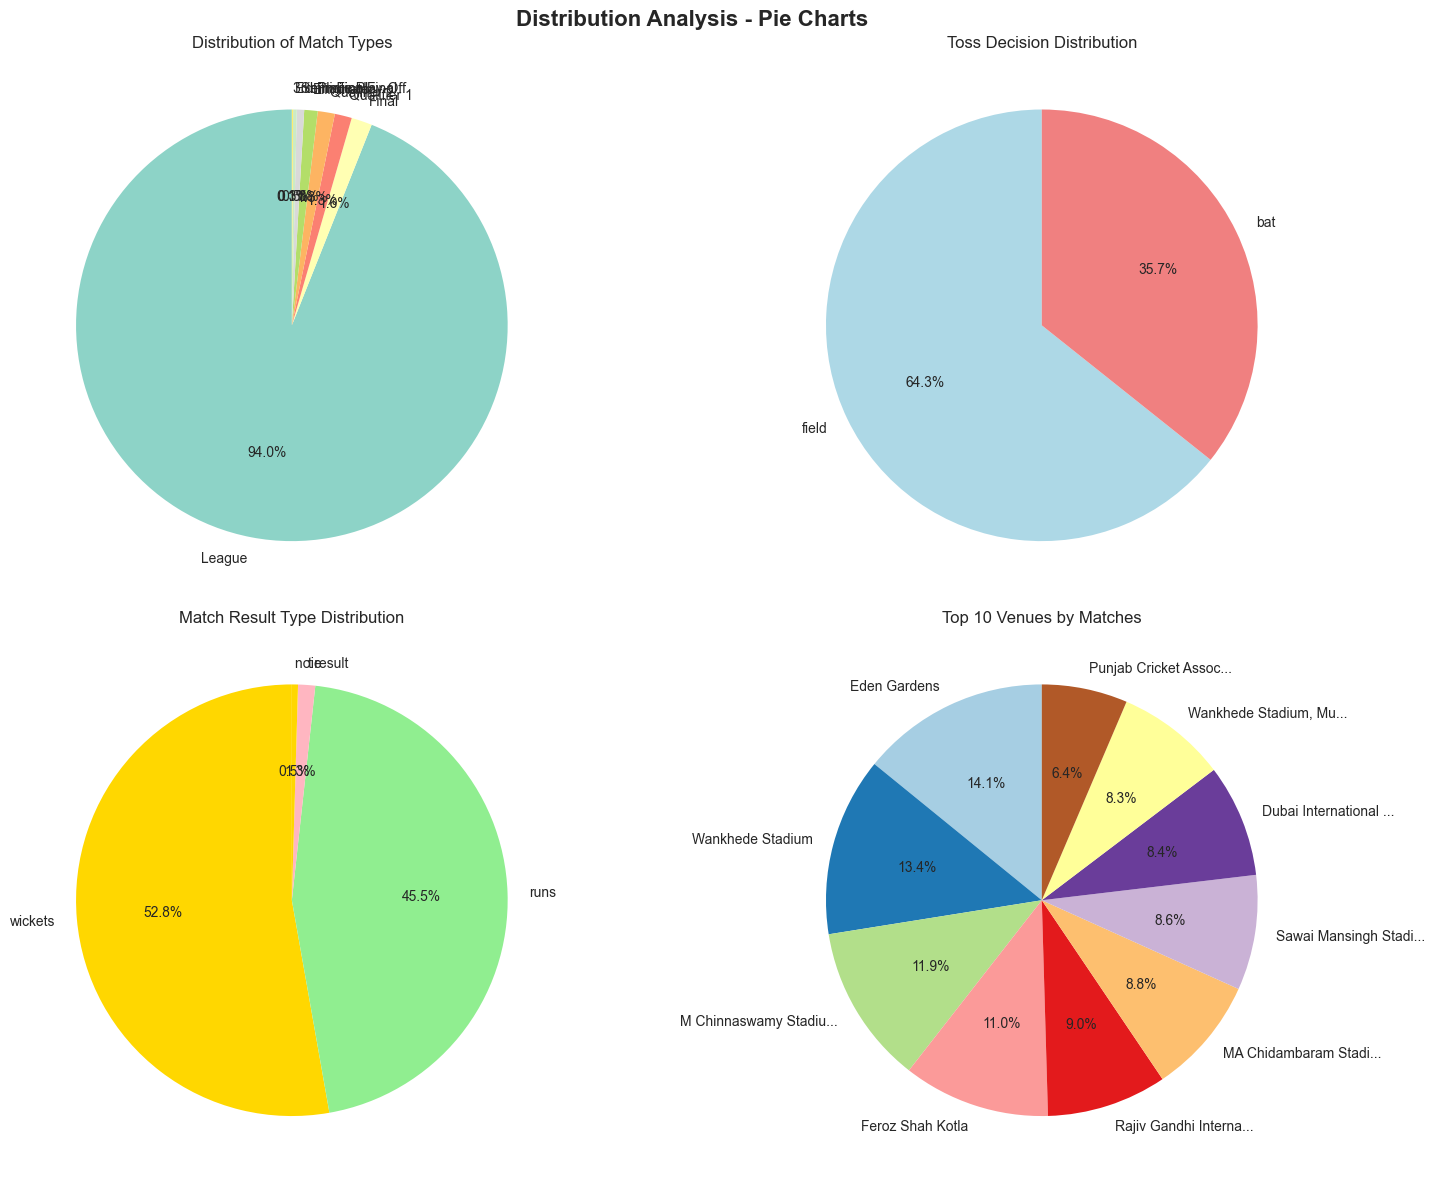

In [9]:
# Create subplots for pie charts
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribution Analysis - Pie Charts', fontsize=16, fontweight='bold')

# 1. Match types distribution
match_types = df['match_type'].value_counts()
colors1 = plt.cm.Set3(np.linspace(0, 1, len(match_types)))
axes[0, 0].pie(match_types.values, labels=match_types.index, autopct='%1.1f%%', 
               startangle=90, colors=colors1)
axes[0, 0].set_title('Distribution of Match Types')

# 2. Toss decision distribution
toss_decision = df['toss_decision'].value_counts()
colors2 = ['lightblue', 'lightcoral']
axes[0, 1].pie(toss_decision.values, labels=toss_decision.index, autopct='%1.1f%%', 
               startangle=90, colors=colors2)
axes[0, 1].set_title('Toss Decision Distribution')

# 3. Result type distribution
result_types = df['result'].value_counts()
colors3 = ['gold', 'lightgreen', 'lightpink']
axes[1, 0].pie(result_types.values, labels=result_types.index, autopct='%1.1f%%', 
               startangle=90, colors=colors3)
axes[1, 0].set_title('Match Result Type Distribution')

# 4. Venue distribution (top 10)
top_venues = df['venue'].value_counts().head(10)
colors4 = plt.cm.Paired(np.linspace(0, 1, len(top_venues)))
axes[1, 1].pie(top_venues.values, labels=[venue[:20] + '...' if len(venue) > 20 else venue for venue in top_venues.index], 
               autopct='%1.1f%%', startangle=90, colors=colors4)
axes[1, 1].set_title('Top 10 Venues by Matches')

plt.tight_layout()
plt.show()

## 3. Bar Chart Visualizations

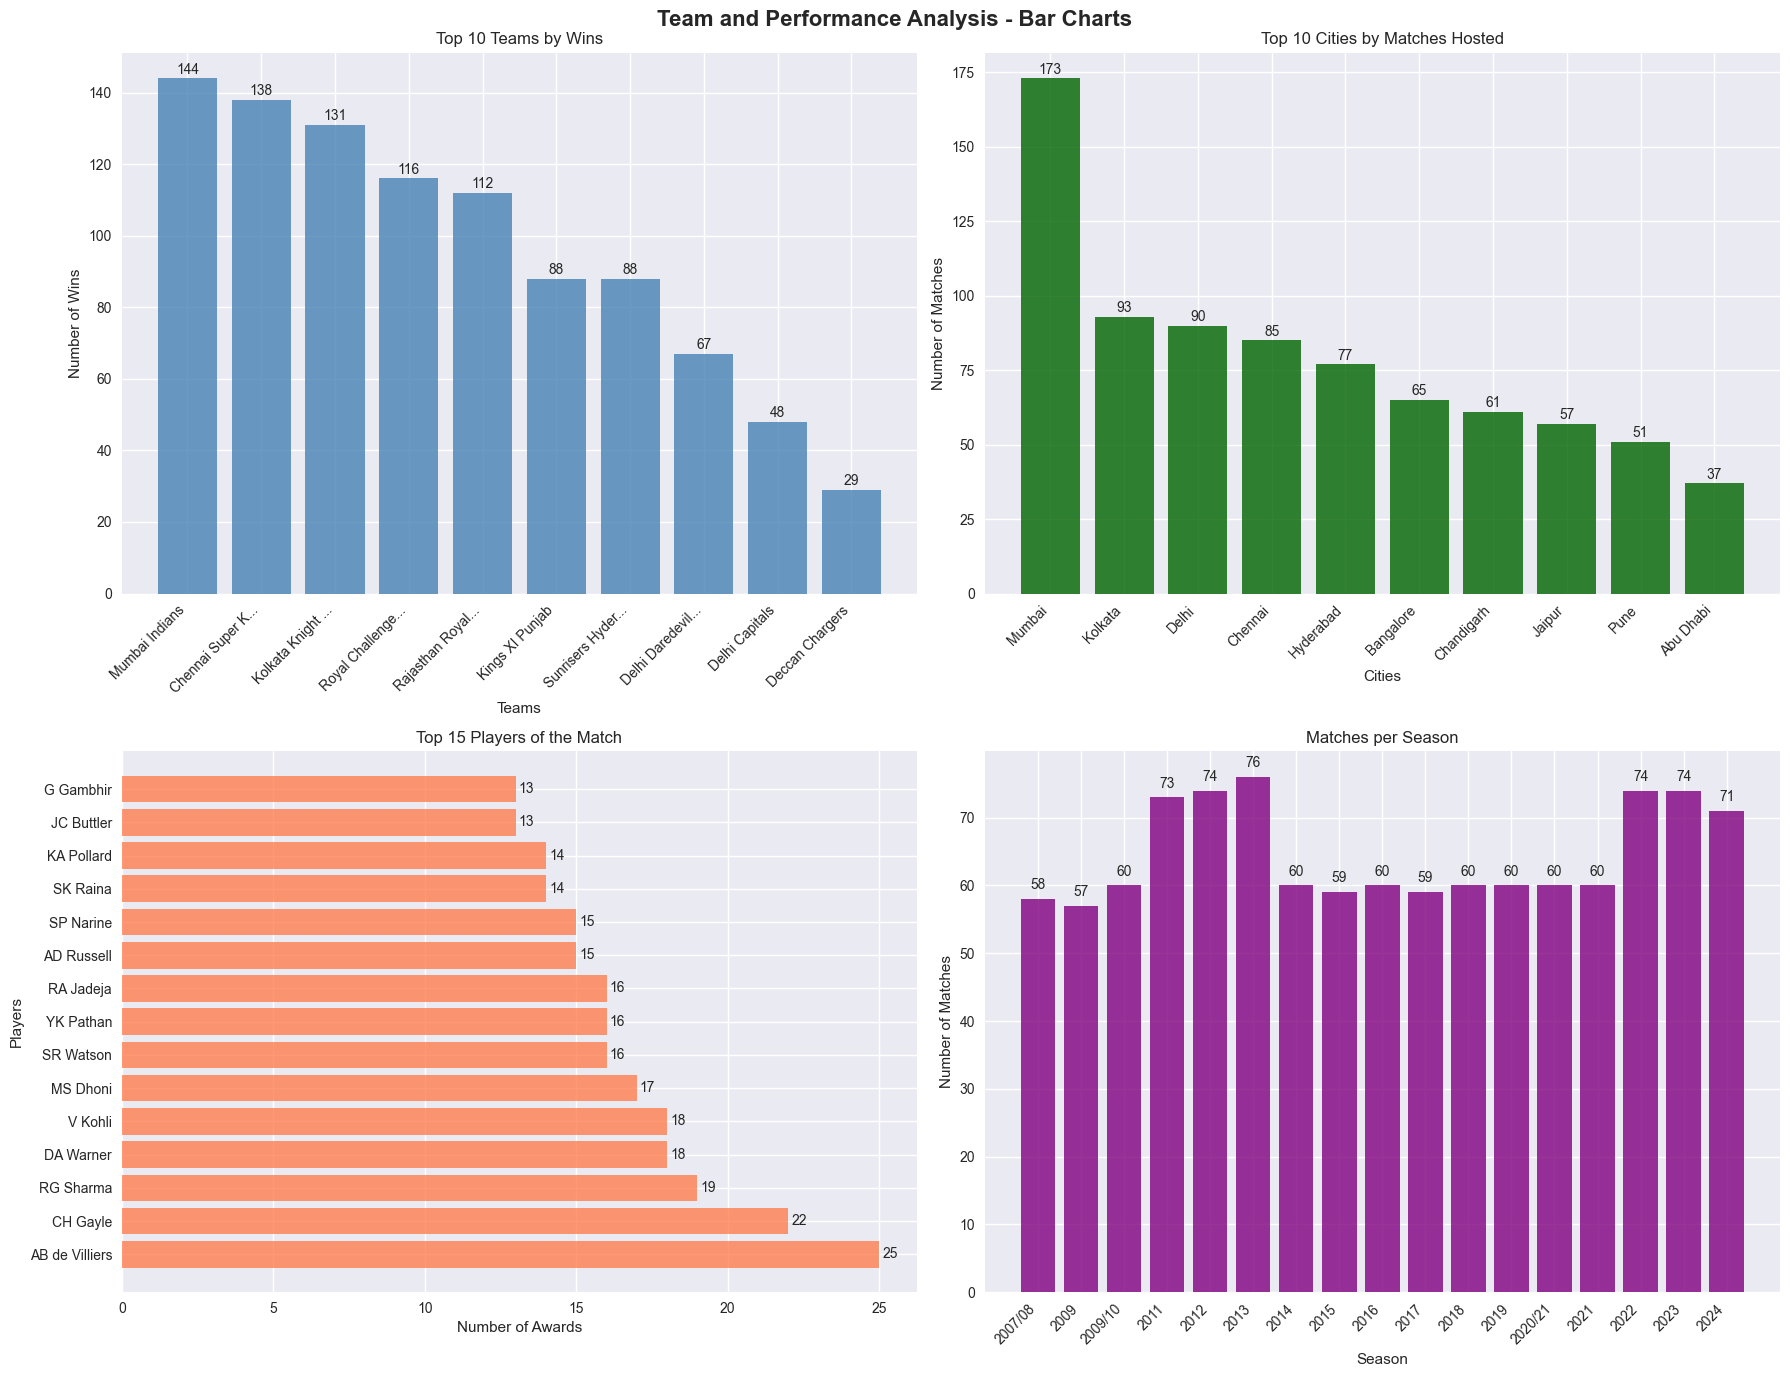

In [10]:
# Create multiple bar charts
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Team and Performance Analysis - Bar Charts', fontsize=16, fontweight='bold')

# 1. Most successful teams (wins)
team_wins = df['winner'].value_counts().head(10)
axes[0, 0].bar(range(len(team_wins)), team_wins.values, color='steelblue', alpha=0.8)
axes[0, 0].set_title('Top 10 Teams by Wins')
axes[0, 0].set_xlabel('Teams')
axes[0, 0].set_ylabel('Number of Wins')
axes[0, 0].set_xticks(range(len(team_wins)))
axes[0, 0].set_xticklabels([team[:15] + '...' if len(team) > 15 else team for team in team_wins.index], rotation=45, ha='right')

# Add value labels on bars
for i, v in enumerate(team_wins.values):
    axes[0, 0].text(i, v + 0.5, str(v), ha='center', va='bottom')

# 2. Cities hosting most matches
city_matches = df['city'].value_counts().head(10)
axes[0, 1].bar(range(len(city_matches)), city_matches.values, color='darkgreen', alpha=0.8)
axes[0, 1].set_title('Top 10 Cities by Matches Hosted')
axes[0, 1].set_xlabel('Cities')
axes[0, 1].set_ylabel('Number of Matches')
axes[0, 1].set_xticks(range(len(city_matches)))
axes[0, 1].set_xticklabels(city_matches.index, rotation=45, ha='right')

# Add value labels on bars
for i, v in enumerate(city_matches.values):
    axes[0, 1].text(i, v + 0.5, str(v), ha='center', va='bottom')

# 3. Player of the match frequency (top 15)
pom_counts = df['player_of_match'].value_counts().head(15)
axes[1, 0].barh(range(len(pom_counts)), pom_counts.values, color='coral', alpha=0.8)
axes[1, 0].set_title('Top 15 Players of the Match')
axes[1, 0].set_xlabel('Number of Awards')
axes[1, 0].set_ylabel('Players')
axes[1, 0].set_yticks(range(len(pom_counts)))
axes[1, 0].set_yticklabels(pom_counts.index)

# Add value labels on bars
for i, v in enumerate(pom_counts.values):
    axes[1, 0].text(v + 0.1, i, str(v), ha='left', va='center')

# 4. Matches per season
season_matches = df['season'].value_counts().sort_index()
axes[1, 1].bar(range(len(season_matches)), season_matches.values, color='purple', alpha=0.8)
axes[1, 1].set_title('Matches per Season')
axes[1, 1].set_xlabel('Season')
axes[1, 1].set_ylabel('Number of Matches')
axes[1, 1].set_xticks(range(len(season_matches)))
axes[1, 1].set_xticklabels(season_matches.index, rotation=45, ha='right')

# Add value labels on bars
for i, v in enumerate(season_matches.values):
    axes[1, 1].text(i, v + 1, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 4. Advanced Visualizations

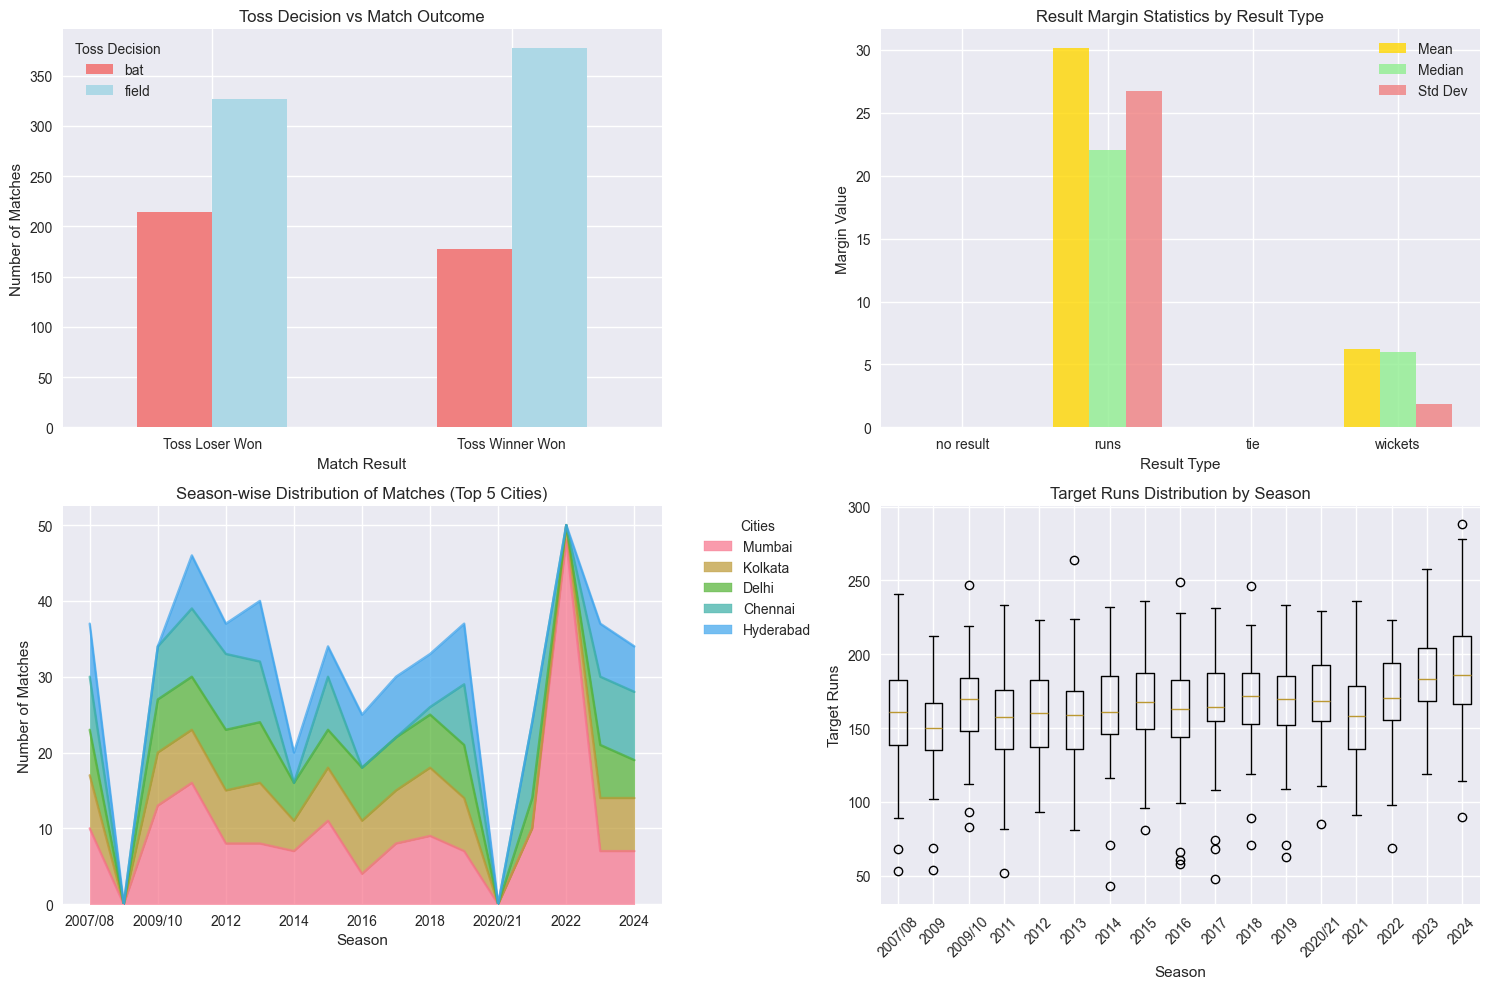

In [11]:
# 1. Toss vs Match Result Analysis
plt.figure(figsize=(15, 10))

# Create a crosstab for toss winner vs match winner
toss_vs_win = pd.crosstab(df['toss_winner'] == df['winner'], df['toss_decision'])
toss_vs_win.index = ['Toss Loser Won', 'Toss Winner Won']

plt.subplot(2, 2, 1)
toss_vs_win.plot(kind='bar', ax=plt.gca(), color=['lightcoral', 'lightblue'])
plt.title('Toss Decision vs Match Outcome')
plt.xlabel('Match Result')
plt.ylabel('Number of Matches')
plt.xticks(rotation=0)
plt.legend(title='Toss Decision')

# 2. Win percentage by result type
plt.subplot(2, 2, 2)
result_margin_stats = df.groupby('result')['result_margin'].agg(['mean', 'median', 'std']).fillna(0)
x = range(len(result_margin_stats))
width = 0.25
plt.bar([i - width for i in x], result_margin_stats['mean'], width, label='Mean', alpha=0.8, color='gold')
plt.bar(x, result_margin_stats['median'], width, label='Median', alpha=0.8, color='lightgreen')
plt.bar([i + width for i in x], result_margin_stats['std'], width, label='Std Dev', alpha=0.8, color='lightcoral')
plt.title('Result Margin Statistics by Result Type')
plt.xlabel('Result Type')
plt.ylabel('Margin Value')
plt.xticks(x, result_margin_stats.index)
plt.legend()

# 3. Season-wise match distribution
plt.subplot(2, 2, 3)
season_city = df.groupby(['season', 'city']).size().unstack(fill_value=0)
top_cities = df['city'].value_counts().head(5).index
season_city_top = season_city[top_cities]
season_city_top.plot(kind='area', stacked=True, alpha=0.7, ax=plt.gca())
plt.title('Season-wise Distribution of Matches (Top 5 Cities)')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.legend(title='Cities', bbox_to_anchor=(1.05, 1), loc='upper left')

# 4. Box plot for target runs by season
plt.subplot(2, 2, 4)
df_target = df.dropna(subset=['target_runs'])
seasons = sorted(df_target['season'].unique())
target_data = [df_target[df_target['season'] == season]['target_runs'].values for season in seasons]
plt.boxplot(target_data, labels=seasons)
plt.title('Target Runs Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Target Runs')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 5. Correlation and Heatmap Analysis

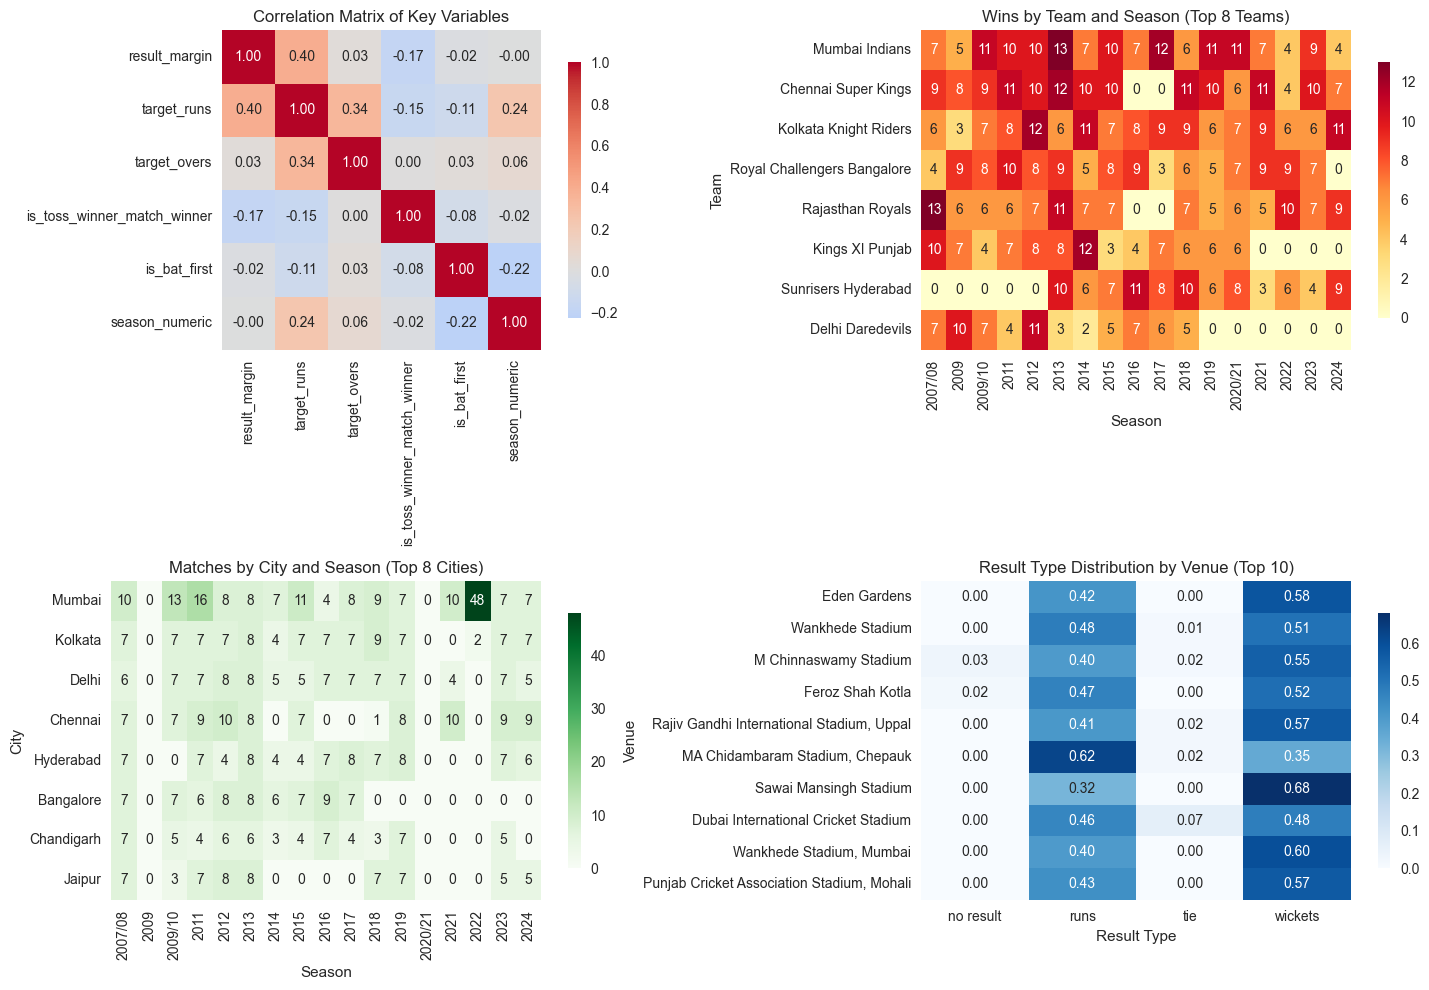

In [12]:
# Create correlation matrix for numerical columns
plt.figure(figsize=(15, 10))

# Prepare numerical data
numerical_cols = ['result_margin', 'target_runs', 'target_overs']
df_numeric = df[numerical_cols].dropna()

# Add some derived features
df_analysis = df.copy()
df_analysis['is_toss_winner_match_winner'] = (df_analysis['toss_winner'] == df_analysis['winner']).astype(int)
df_analysis['is_bat_first'] = (df_analysis['toss_decision'] == 'bat').astype(int)
df_analysis['season_numeric'] = pd.to_numeric(df_analysis['season'].str[:4], errors='coerce')

# Create heatmap data
heatmap_data = df_analysis[['result_margin', 'target_runs', 'target_overs', 
                           'is_toss_winner_match_winner', 'is_bat_first', 'season_numeric']].dropna()

plt.subplot(2, 2, 1)
correlation_matrix = heatmap_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Key Variables')

# Team performance heatmap
plt.subplot(2, 2, 2)
team_season_wins = df.groupby(['winner', 'season']).size().unstack(fill_value=0)
top_teams = df['winner'].value_counts().head(8).index
team_season_wins_top = team_season_wins.loc[top_teams]
sns.heatmap(team_season_wins_top, annot=True, fmt='d', cmap='YlOrRd', 
            cbar_kws={'shrink': 0.8})
plt.title('Wins by Team and Season (Top 8 Teams)')
plt.xlabel('Season')
plt.ylabel('Team')

# City-season matches heatmap
plt.subplot(2, 2, 3)
city_season_matches = df.groupby(['city', 'season']).size().unstack(fill_value=0)
top_cities_matches = df['city'].value_counts().head(8).index
city_season_matches_top = city_season_matches.loc[top_cities_matches]
sns.heatmap(city_season_matches_top, annot=True, fmt='d', cmap='Greens', 
            cbar_kws={'shrink': 0.8})
plt.title('Matches by City and Season (Top 8 Cities)')
plt.xlabel('Season')
plt.ylabel('City')

# Venue analysis
plt.subplot(2, 2, 4)
venue_results = pd.crosstab(df['venue'], df['result']).fillna(0)
top_venues_results = df['venue'].value_counts().head(10).index
venue_results_top = venue_results.loc[top_venues_results]
venue_results_normalized = venue_results_top.div(venue_results_top.sum(axis=1), axis=0)
sns.heatmap(venue_results_normalized, annot=True, fmt='.2f', cmap='Blues', 
            cbar_kws={'shrink': 0.8})
plt.title('Result Type Distribution by Venue (Top 10)')
plt.xlabel('Result Type')
plt.ylabel('Venue')

plt.tight_layout()
plt.show()

## 6. Additional Insights and Statistics

In [13]:
# Generate interesting statistics
print("=== IPL MATCHES DATASET INSIGHTS ===")
print(f"Total matches in dataset: {len(df)}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Total unique teams: {df[['team1', 'team2']].stack().nunique()}")
print(f"Total unique players of match: {df['player_of_match'].nunique()}")
print(f"Total unique venues: {df['venue'].nunique()}")
print(f"Total unique cities: {df['city'].nunique()}")

print("\n=== TOSS ANALYSIS ===")
toss_win_match = (df['toss_winner'] == df['winner']).value_counts()
toss_advantage = toss_win_match[True] / len(df) * 100
print(f"Toss winner also wins match: {toss_advantage:.1f}% of the time")

bat_first_wins = df[df['toss_decision'] == 'bat']['winner'].count()
field_first_wins = df[df['toss_decision'] == 'field']['winner'].count()
print(f"Teams choosing to bat first: {len(df[df['toss_decision'] == 'bat'])}")
print(f"Teams choosing to field first: {len(df[df['toss_decision'] == 'field'])}")

print("\n=== MATCH RESULTS ===")
result_stats = df['result'].value_counts()
for result_type, count in result_stats.items():
    percentage = count / len(df) * 100
    print(f"{result_type.title()} victories: {count} ({percentage:.1f}%)")

print("\n=== PERFORMANCE STATS ===")
avg_target = df['target_runs'].mean()
print(f"Average target runs: {avg_target:.1f}")

highest_target = df['target_runs'].max()
highest_target_match = df[df['target_runs'] == highest_target]
print(f"Highest target: {highest_target} runs")

avg_runs_margin = df[df['result'] == 'runs']['result_margin'].mean()
avg_wickets_margin = df[df['result'] == 'wickets']['result_margin'].mean()
print(f"Average winning margin (runs): {avg_runs_margin:.1f}")
print(f"Average winning margin (wickets): {avg_wickets_margin:.1f}")

print("\n=== TOP PERFORMERS ===")
most_wins_team = df['winner'].value_counts().index[0]
most_wins_count = df['winner'].value_counts().iloc[0]
print(f"Most successful team: {most_wins_team} ({most_wins_count} wins)")

most_pom = df['player_of_match'].value_counts().index[0]
most_pom_count = df['player_of_match'].value_counts().iloc[0]
print(f"Most Player of Match awards: {most_pom} ({most_pom_count} awards)")

most_matches_city = df['city'].value_counts().index[0]
most_matches_count = df['city'].value_counts().iloc[0]
print(f"City with most matches: {most_matches_city} ({most_matches_count} matches)")

=== IPL MATCHES DATASET INSIGHTS ===
Total matches in dataset: 1095
Date range: 2008-04-18 to 2024-05-26
Total unique teams: 19
Total unique players of match: 291
Total unique venues: 58
Total unique cities: 36

=== TOSS ANALYSIS ===
Toss winner also wins match: 50.6% of the time
Teams choosing to bat first: 391
Teams choosing to field first: 704

=== MATCH RESULTS ===
Wickets victories: 578 (52.8%)
Runs victories: 498 (45.5%)
Tie victories: 14 (1.3%)
No Result victories: 5 (0.5%)

=== PERFORMANCE STATS ===
Average target runs: 165.7
Highest target: 288.0 runs
Average winning margin (runs): 30.1
Average winning margin (wickets): 6.2

=== TOP PERFORMERS ===
Most successful team: Mumbai Indians (144 wins)
Most Player of Match awards: AB de Villiers (25 awards)
City with most matches: Mumbai (173 matches)


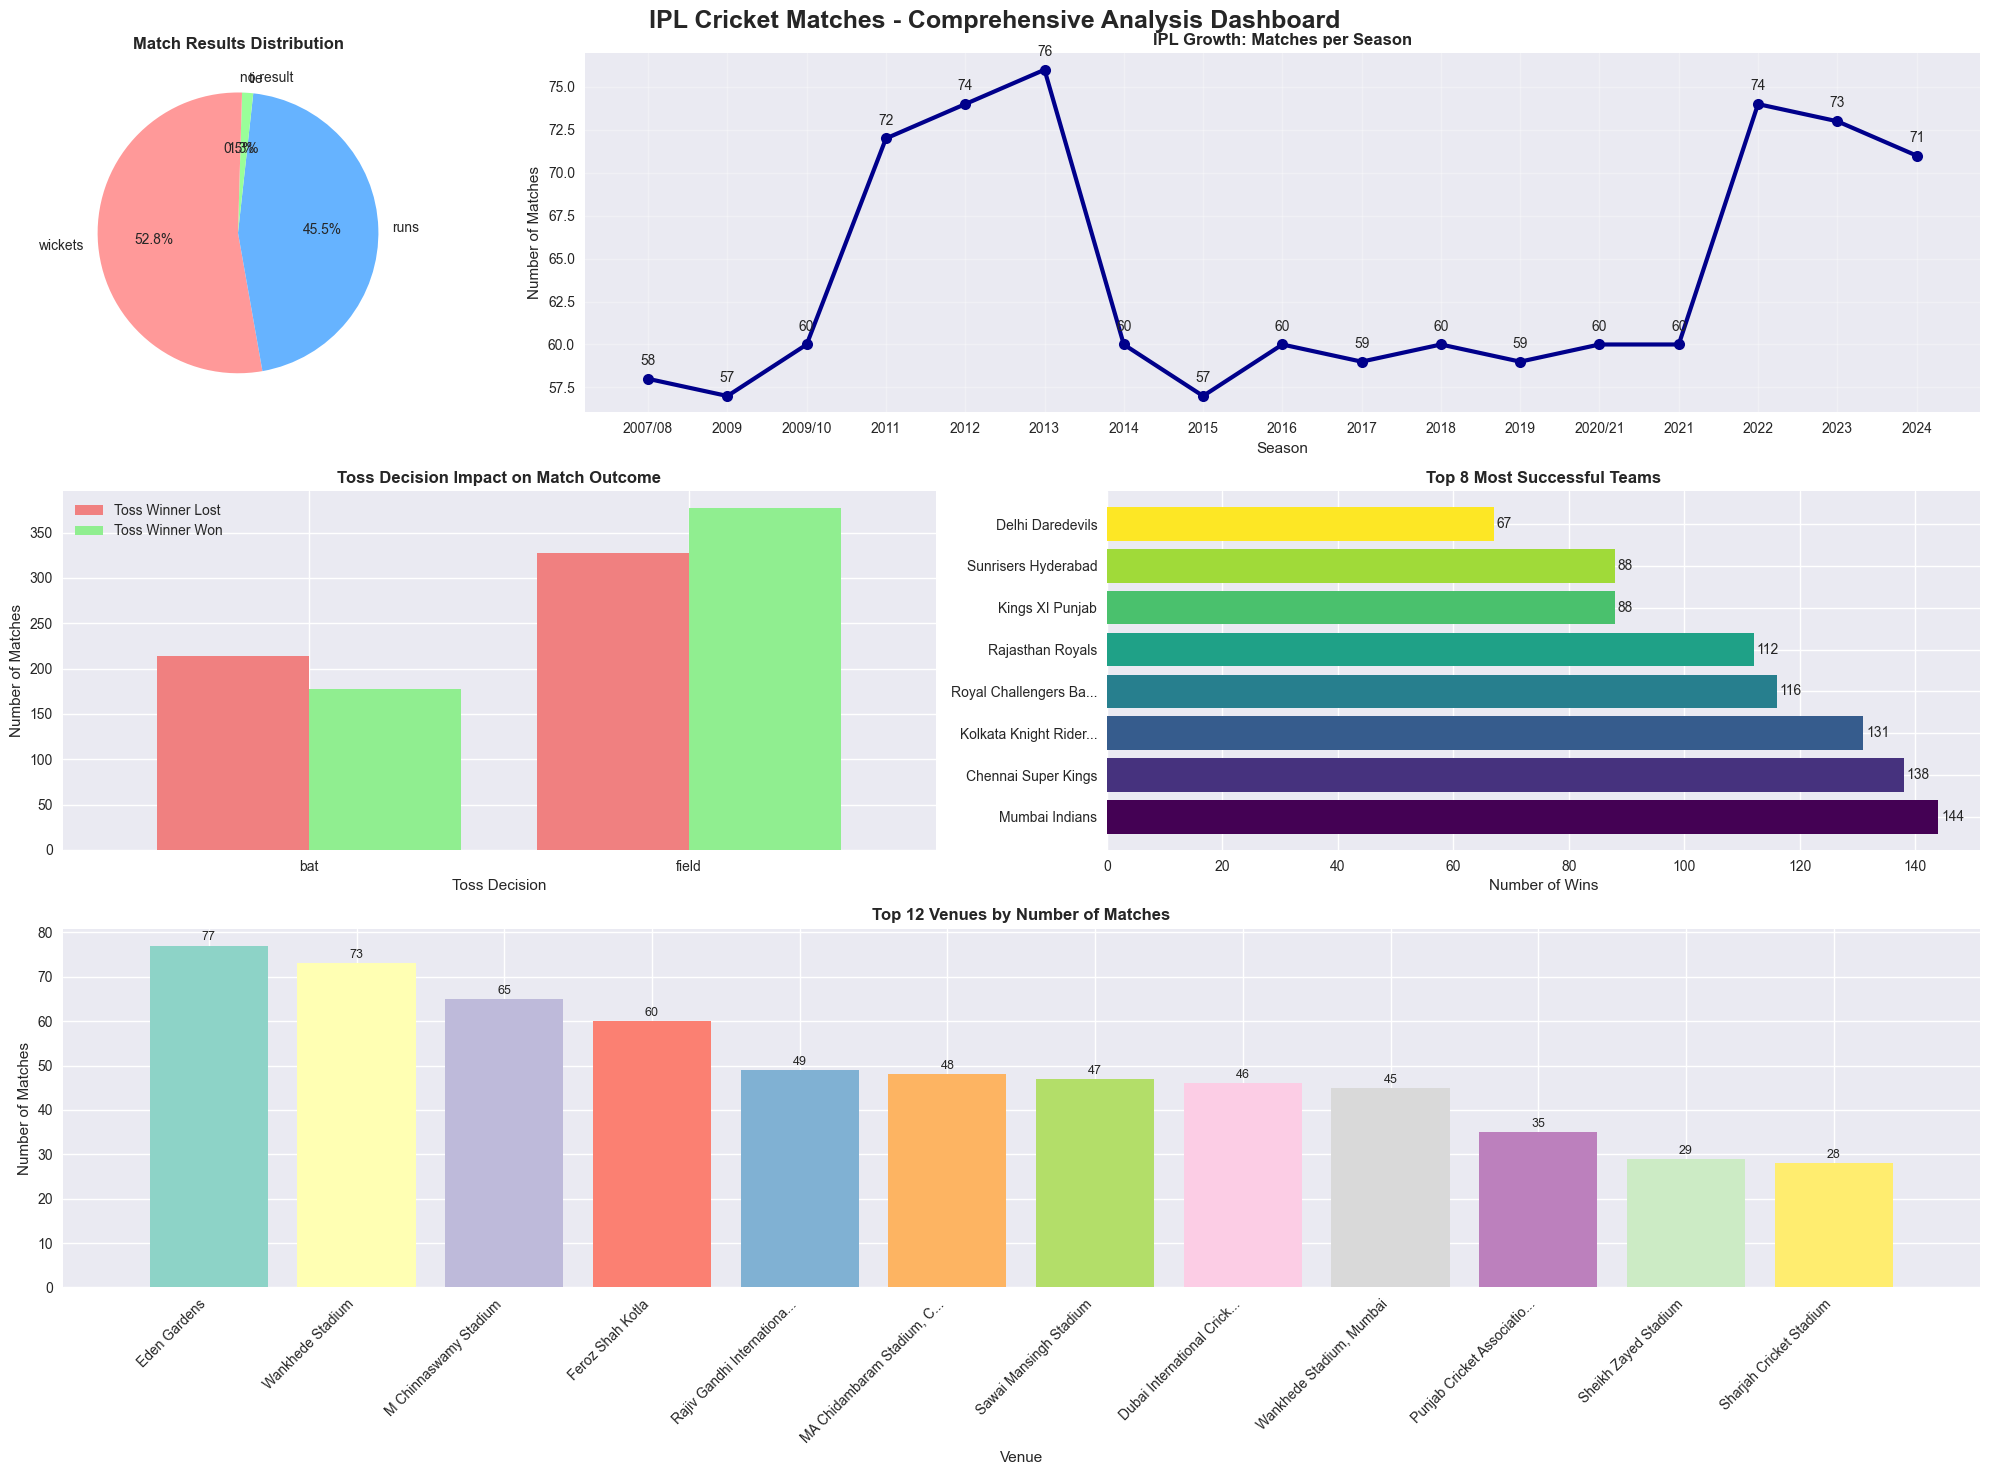

In [14]:
# Final comprehensive visualization
plt.figure(figsize=(20, 15))

# Create a dashboard-style visualization
gs = plt.GridSpec(3, 4, figure=plt.gcf())

# 1. Match results pie chart
ax1 = plt.subplot(gs[0, 0])
result_counts = df['result'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99']
wedges, texts, autotexts = ax1.pie(result_counts.values, labels=result_counts.index, 
                                   autopct='%1.1f%%', colors=colors, startangle=90)
ax1.set_title('Match Results Distribution', fontweight='bold')

# 2. Season progression
ax2 = plt.subplot(gs[0, 1:])
season_progression = df.groupby('season')['winner'].count()
ax2.plot(season_progression.index, season_progression.values, marker='o', linewidth=3, markersize=8, color='darkblue')
ax2.set_title('IPL Growth: Matches per Season', fontweight='bold')
ax2.set_xlabel('Season')
ax2.set_ylabel('Number of Matches')
ax2.grid(True, alpha=0.3)
for i, v in enumerate(season_progression.values):
    ax2.annotate(str(v), (season_progression.index[i], v), textcoords="offset points", xytext=(0,10), ha='center')

# 3. Toss decision impact
ax3 = plt.subplot(gs[1, :2])
toss_impact = pd.crosstab(df['toss_decision'], df['toss_winner'] == df['winner'])
toss_impact.columns = ['Toss Winner Lost', 'Toss Winner Won']
toss_impact.plot(kind='bar', ax=ax3, color=['lightcoral', 'lightgreen'], width=0.8)
ax3.set_title('Toss Decision Impact on Match Outcome', fontweight='bold')
ax3.set_xlabel('Toss Decision')
ax3.set_ylabel('Number of Matches')
ax3.legend()
ax3.tick_params(axis='x', rotation=0)

# 4. Team dominance
ax4 = plt.subplot(gs[1, 2:])
top_teams = df['winner'].value_counts().head(8)
bars = ax4.barh(range(len(top_teams)), top_teams.values, color=plt.cm.viridis(np.linspace(0, 1, len(top_teams))))
ax4.set_title('Top 8 Most Successful Teams', fontweight='bold')
ax4.set_xlabel('Number of Wins')
ax4.set_yticks(range(len(top_teams)))
ax4.set_yticklabels([team[:20] + '...' if len(team) > 20 else team for team in top_teams.index])
for i, v in enumerate(top_teams.values):
    ax4.text(v + 0.5, i, str(v), va='center')

# 5. Venue popularity
ax5 = plt.subplot(gs[2, :])
venue_matches = df['venue'].value_counts().head(12)
bars = ax5.bar(range(len(venue_matches)), venue_matches.values, 
               color=plt.cm.Set3(np.linspace(0, 1, len(venue_matches))))
ax5.set_title('Top 12 Venues by Number of Matches', fontweight='bold')
ax5.set_xlabel('Venue')
ax5.set_ylabel('Number of Matches')
ax5.set_xticks(range(len(venue_matches)))
ax5.set_xticklabels([venue[:25] + '...' if len(venue) > 25 else venue for venue in venue_matches.index], 
                    rotation=45, ha='right')
for i, v in enumerate(venue_matches.values):
    ax5.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=9)

plt.suptitle('IPL Cricket Matches - Comprehensive Analysis Dashboard', 
             fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

## Summary

This comprehensive analysis of the IPL matches dataset has revealed several interesting insights:

1. **Match Distribution**: The dataset contains matches from multiple IPL seasons with varying numbers of matches per season
2. **Toss Impact**: Analysis shows the correlation between toss decisions and match outcomes
3. **Team Performance**: Identification of most successful teams and their winning patterns
4. **Venue Analysis**: Popular venues and their characteristics
5. **Player Performance**: Top performers in terms of Player of the Match awards
6. **Result Patterns**: Distribution of winning margins and result types

The visualizations include:
- **Histograms**: Distribution of numerical variables like margins, target runs
- **Pie Charts**: Categorical distributions for match types, toss decisions, venues
- **Bar Charts**: Team performance, city analysis, player awards
- **Heatmaps**: Correlation analysis and cross-tabulations
- **Advanced Plots**: Box plots, area charts, and comprehensive dashboards

These visualizations provide a complete picture of the IPL cricket tournament patterns and can be used for further analysis and insights.